Jason Cain, Nathan Harms, Marissa Puzan
## Serotonin transport modeling 


Laminar flow model:

## $$ \frac{C_m}{C_o} = \sum_{n} M_n e^{- \beta^2 Gz} $$



from
$$v_z \frac{\partial C}{\partial z} = D \frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial C}{\partial r} \right)$$
where 

$$ Gz = \frac{D L}{V_m R^2} $$

$$ P_w^* = P_w \left( \frac{R}{D} \right) $$

$$ M_n = f( P_w^* ) $$ 

$$ \beta = f( P_w^* ) $$ 

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import laminarFlow

Arguments for LaminarFlow(self, n, serConcentration, serGraetz, effSerPermeability, M_Beta_file = 'valuesBetaM.txt'):

In [3]:
Model = laminarFlow.LaminarFlow(10, .1, .2, .1)

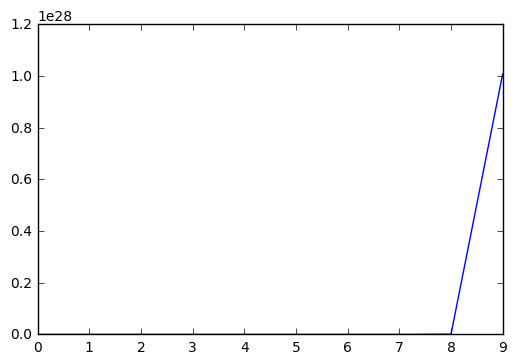

In [4]:
plt.plot(Model.serConcentration)